# <p style="text-align: center;">  Summary Statistics </p>


#### What do we wish to accomplish?

1. The first step is to create a linear regression model, determine which parameters are significant, and then continuously repeat this process until we have a good model.

2. How can we determine how great the model is? We can look at the adjusted R-Squared of our model. We will also take a look at residual plots to find outliers and leverage points.



Initial thoughts:

We are attempting to determine whether or not a play results in a first down conversion, or whether or not to 'go for it' on a fourth down. 

In [1]:
# Everybody's favorite imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("plays_4thdowns.csv")

# Getting the columns necessary
newdata = data[["down", "quarter", 'yardsToGo', 'yardlineNumber', 'defendersInTheBox', 
                'numberOfPassRushers', 'HomeScoreBeforePlay', 'HomeScoreAfterPlay', 'VisitorScoreBeforePlay',
               'VisitorScoreBeforePlay', 'isPenalty', 'PassLength', 'YardsAfterCatch', 'PlayResult',
               'firstDown_Conversion']]

newdata = newdata.dropna()

In [3]:
# Creating train and test sets
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets (70-30 split is ideal)
X_train, X_test, y_train, y_test = train_test_split(newdata.drop('firstDown_Conversion', axis=1), 
                                                    newdata['firstDown_Conversion'], test_size=0.3, random_state=42)

# Print the size of the training and testing sets
#print(f"Training set size: {len(train_set)}\nTest set size: {len(test_set)}")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model and fit it to the training data
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8461538461538461


/home/anolickb/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We received an accuracy score of 0.84. That's not bad! However, we want to aim to get this model to have an accuracy of at least 0.95 (this is preference, but I believe this is a good score).

In [5]:
print("Coefficients: ", lr_model.coef_, '\n')
print("Intercept: ", lr_model.intercept_, '\n')

Coefficients:  [[-0.00803561  0.03701661 -1.18450159  0.03157324  0.16788192  0.02490207
  -0.11447176  0.07117571  0.04414183  0.04414183  0.01185547  0.63649603
  -0.251396    0.54542646]] 

Intercept:  [0.32924953] 



Lets take a look at some residual plots!

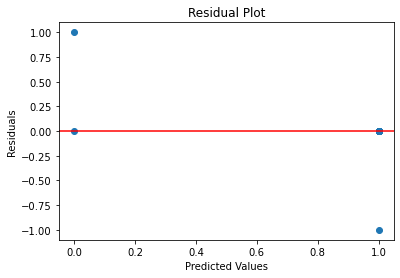

Classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.91      0.91      0.91        11

    accuracy                           0.85        13
   macro avg       0.70      0.70      0.70        13
weighted avg       0.85      0.85      0.85        13



In [6]:
residuals = y_test - y_pred
from sklearn.metrics import classification_report
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()
print("Classification report:\n", classification_report(y_test, y_pred))

# I guess this was kinda useful for logistic regression

In [7]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
confusion


array([[ 1,  1],
       [ 1, 10]])

Interesting, we received 1 True Positive and 10 True Negatives, and only 1 False Pos. and 1 False Neg.